# **HW2: Kinematics of Robot**

คำชี้แจง
1. ให้เขียนโค้ดเพื่อตอบโจทย์ในแต่ละข้อในไฟล์นี้ และแสดงวิธีทำข้อที่ 1 (ต้องมี) และข้ออื่น ๆ (ถ้ามี) ลงบนกระดาษทด (1 กระดาษทด/คู่)
2. ส่งงานเป็นไฟล์ ZIP โดยตั้งชื่อ FRA333_HW2_65xx_65xx.zip โดยมีไฟล์นี้ชื่อ HW2_notebook.ipynb และไฟล์กระดาษทดที่ตั้งชื่อ 65xx_65xx.pdf อยู่ข้างใน

In [71]:
import roboticstoolbox as rtb
import numpy as np

from spatialmath import SE3
from math import pi

## 1. Modified DH-Parameters

กำหนดให้แขนกลซึ่งเป็น Serial Manipulator มี Home Configuration ดังภาพ โดยมีเฟรม {0} เป็น Base Frame ที่ใช้อ้างอิงในการทำระบบควบคุมต่าง ๆ และเฟรม {e} เป็นเฟรมของ End-effector (ให้ Link $L_2$ ตั้งฉากกับพื้นโลก)

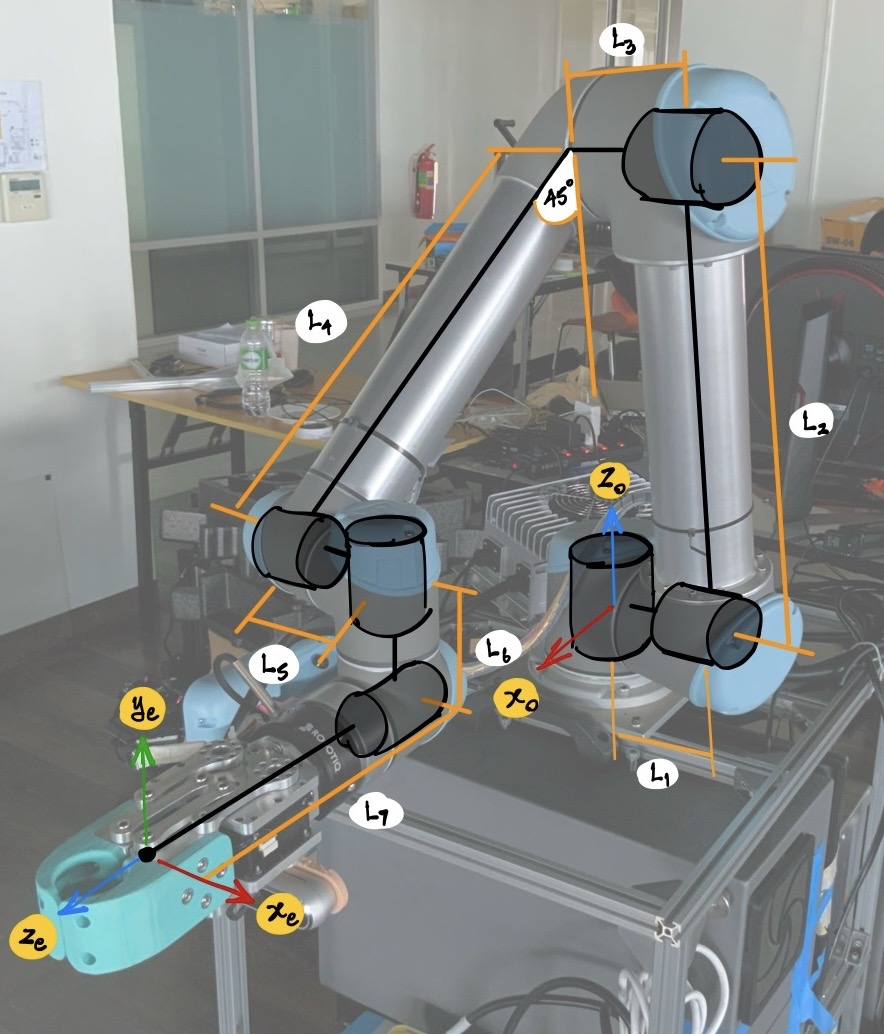

##### 1.1. จงหา MDH-Parameter ของแขนกล หากกำหนดให้ $L_1=200 mm$, $L_2=700 mm$, $L_3=200 mm$, $L_4=700 mm$, $L_5=200 mm$, $L_6=300 mm$, และ $L_7=500 mm$ ระบุวิธีทำและวิธีการตั้งแกนมาในกระดาษทด

In [8]:
# Define the robot using DH parameters(with SI unit)
robot = rtb.DHRobot(
    [
        rtb.RevoluteMDH(),  
        rtb.RevoluteMDH(alpha=-pi/2 ,d=0.2 , offset=-pi/2),  
        rtb.RevoluteMDH(a=0.7 ,d=-0.2 ,offset= 3*pi/4),  
        rtb.RevoluteMDH(a=0.7 ,d=0.2 ,offset= -pi/4),
        rtb.RevoluteMDH(alpha=pi/2 ,d=-0.3 ,offset= pi/2),
        rtb.RevoluteMDH(alpha=pi/2),
    ],
    tool = SE3(0,0,0.5),
    name = "6DOF_Robot"
)

print(robot)

DHRobot: 6DOF_Robot, 6 joints (RRRRRR), dynamics, modified DH parameters
┌──────┬────────┬────────────┬──────┐
│ aⱼ₋₁ │  ⍺ⱼ₋₁  │     θⱼ     │  dⱼ  │
├──────┼────────┼────────────┼──────┤
│  0.0 │   0.0° │         q1 │  0.0 │
│  0.0 │ -90.0° │   q2 - 90° │  0.2 │
│  0.7 │   0.0° │  q3 + 135° │ -0.2 │
│  0.7 │   0.0° │   q4 - 45° │  0.2 │
│  0.0 │  90.0° │   q5 + 90° │ -0.3 │
│  0.0 │  90.0° │         q6 │  0.0 │
└──────┴────────┴────────────┴──────┘

┌──────┬─────────────────────────────────────┐
│ tool │ t = 0, 0, 0.5; rpy/xyz = 0°, 0°, 0° │
└──────┴─────────────────────────────────────┘



##### 1.2. จงแสดงให้เห็นว่า MDH-Parameter ที่ระบุมาในข้อ 1.1 สามารถแสดง Kinematic ของหุ่นยนต์ได้

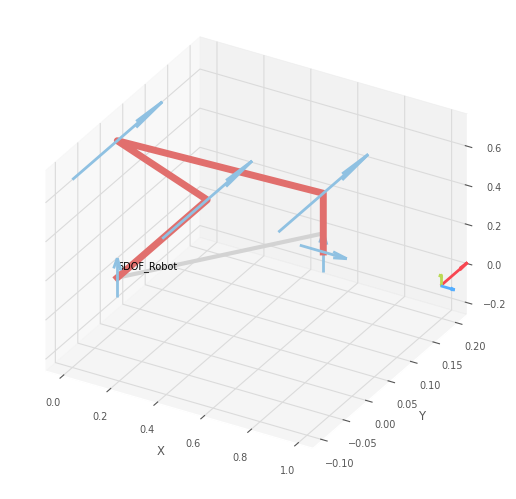

   0         0         1         0.995     
   1         0         0         0.2       
   0         1         0        -0.09497   
   0         0         0         1         



<Figure size 640x480 with 0 Axes>

In [10]:
q = [0, 0, 0, 0, 0, 0]
T_0e = robot.fkine(q)

robot.plot(q)

print(T_0e)

## 2. Forward Kinematics

##### 2.1. จงหา POSE ของเฟรม {e} เมื่อกำหนดให้ [$q_1$, $q_2$, $q_3$, $q_4$, $q_5$, $q_6$] เท่ากับ 45, 30, 60, 30, 90, และ 270 องศา ตามลำดับ

In [45]:
qe = [pi/4, pi/6, pi/3, pi/6, pi/2, 3*pi/2]

P_0e = robot.fkine(qe)
print(np.deg2rad(qe))
print(P_0e)

[0.01370778 0.00913852 0.01827705 0.00913852 0.02741557 0.0822467 ]
  -0.6124    0.3536   -0.7071   -0.7812    
  -0.6124    0.3536    0.7071    0.2088    
   0.5       0.866     0         0.2612    
   0         0         0         1         



##### 2.2. จงแสดงให้เห็นว่าคำตอบข้อที่ตอบมาในข้อที่ 2.1. เป็นคำตอบที่ถูกต้อง

นิ้งดูให้หน่อย มันได้ไม่ตรงง้ะะ

In [22]:
def Modify_XZ(tx,rx,tz,rz):
    return SE3.Rx(rx) * SE3(tx,0,0) * SE3.Rz(rz) * SE3(0,0,tz)

In [26]:
pose = SE3()
set_a = [0, 0, 0.7, 0.7, 0, 0]
set_alpha = [0, -pi/2, 0, 0, -pi/2, pi/2]
set_d = [0, 0.2, -0.2, 0.2, -0.3, 0]
set_offset = [0, -pi/2, 3*pi/4, -pi/4, pi/2, 0]

for i in range(len(robot.links)):
    pose = pose * Modify_XZ(set_a[i] ,set_alpha[i] ,set_d[i] ,q[i] + set_offset[i])
pose = pose * robot.tool
print(pose)

   0.6124    0.3536    0.7071    0.2933    
   0.6124    0.3536   -0.7071   -0.1309    
  -0.5       0.866     0        -0.03876   
   0         0         0         1         



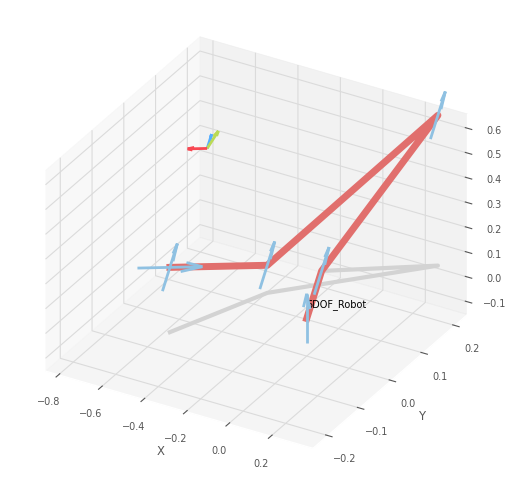

PyPlot3D backend, t = 0.05, scene:
  robot: Text(0.0, 0.0, '6DOF_Robot')

<Figure size 640x480 with 0 Axes>

In [27]:
robot.plot(qe)

## 3. Inverse Kinematics

##### 3.1. หากต้องการควบคุมให้ End-effector ไปอยู่ที่ตำแหน่ง x = 511 mm, y = 684 mm, z = 926 mm โดยมี roll = 30°, pitch = 45°, yaw = 60° (Fixed Axis X-Y-Z) จะมีวิธีการที่สามารถหมุนข้อต่อให้ End-effector อยู่ในท่าทางดังกล่าวได้กี่วิธี เพราะอะไร

##### 3.2. การจะควบคุมให้ End-effector อยู่ในท่าทางดังกล่าวต้องหมุนแต่ละข้อต่ออย่างไรบ้าง 

In [92]:
T_desired = SE3([0.511, 0.684, 0.926]) * SE3.RPY([pi/6, pi/4, pi/3])
print(T_desired)

sols = []

for i in range(50):
    q, success, _, _, _ = robot.ik_LM(T_desired)  
    if not any(np.allclose(q, s, atol=1) for s in sols):
        sols.append(q)

print(sols)

   0.3536   -0.5732    0.7392    0.511     
   0.6124    0.7392    0.2803    0.684     
  -0.7071    0.3536    0.6124    0.926     
   0         0         0         1         

[array([-1.46126567, -1.80197864, -0.73986867,  0.65854899,  0.87168357,
        0.86306595]), array([ 0.95232747,  1.23884337,  2.17869733,  2.11537475, -0.45519598,
       -1.49631652]), array([ 0.95247596, -0.50940439, -0.60790432,  0.36693054, -0.4554728 ,
       -1.49646761]), array([-1.46086234, -0.1848904 ,  2.30948548,  2.27553011,  0.87174141,
        0.8623025 ]), array([ 0.95251994,  2.00317227,  2.05844764, -1.67038478, -2.68606949,
        1.64524502]), array([ 0.952489  ,  0.134775  , -0.48784382,  2.74433428, -2.68616232,
        1.64529047]), array([-1.46123784, -1.32911563, -0.3473306 ,  2.93478751,  2.26990197,
       -2.27857907]), array([-1.46133241,  0.67959116,  1.91840119, -1.34027125,  2.2698245 ,
       -2.27802837])]


##### 3.3. จงแสดงให้เห็นว่าการหมุนข้อต่อที่ตอบมาในข้อ 3.2. เป็นคำตอบที่ถูกต้อง

In [86]:
for i,sol in enumerate(sols):
    print(f"Solution {i+1}")
    fk = robot.fkine(sol)
    print(fk)

Solution 1
   0.3528   -0.573     0.7397    0.511     
   0.6123    0.7392    0.2806    0.6841    
  -0.7076    0.3539    0.6116    0.9255    
   0         0         0         1         

Solution 2
   0.3536   -0.5732    0.7392    0.511     
   0.6124    0.7392    0.2803    0.684     
  -0.7071    0.3536    0.6124    0.926     
   0         0         0         1         

Solution 3
   0.3536   -0.5731    0.7392    0.511     
   0.6124    0.7392    0.2802    0.6839    
  -0.7071    0.3536    0.6124    0.926     
   0         0         0         1         

Solution 4
   0.3537   -0.573     0.7393    0.511     
   0.6124    0.7393    0.2801    0.6836    
  -0.7071    0.3537    0.6124    0.9258    
   0         0         0         1         

Solution 5
   0.3536   -0.5732    0.7392    0.511     
   0.6123    0.7392    0.2803    0.684     
  -0.7071    0.3535    0.6124    0.926     
   0         0         0         1         

Solution 6
   0.3536   -0.5732    0.7392    0.511     
   0.

## 4. Workspace

##### 4.1. จงแสดงให้เห็น Workspace ของหุ่นยนต์